<a href="https://colab.research.google.com/github/Hrithi89/FUTURE_INTERNS_DS_03/blob/main/Future_Interns_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from google.colab import files
uploaded = files.upload()

In [9]:
import pandas as pd
df = pd.read_csv('student_feedback.csv')
print(df.head())        # See the first few rows

   Unnamed: 0  Student ID  Well versed with the subject  \
0           0         340                             5   
1           1         253                             6   
2           2         680                             7   
3           3         806                             9   
4           4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   
3                                           6                     7   
4                                          10                     8   

   Degree of difficulty of assignments  Solves doubts willingly  \
0                                    6                        9   
1                                    6                        2   
2                

In [10]:
print(df.info())        # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [12]:
print(df.isnull().sum())  # Count missing values in each column

Unnamed: 0                                              0
Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64


In [13]:
#removing duplicates
df.drop_duplicates(inplace=True)

Summary statistics for numeric columns

In [14]:
print(df.describe())

        Unnamed: 0   Student ID  Well versed with the subject  \
count  1001.000000  1001.000000                   1001.000000   
mean    500.000000   500.000000                      7.497502   
std     289.108111   289.108111                      1.692998   
min       0.000000     0.000000                      5.000000   
25%     250.000000   250.000000                      6.000000   
50%     500.000000   500.000000                      8.000000   
75%     750.000000   750.000000                      9.000000   
max    1000.000000  1000.000000                     10.000000   

       Explains concepts in an understandable way  Use of presentations  \
count                                 1001.000000           1001.000000   
mean                                     6.081918              5.942058   
std                                      2.597168              1.415853   
min                                      2.000000              4.000000   
25%                                    

Average ratings per Teaching Aspects

In [21]:
# Exclude 'Unnamed: 0' and 'Student ID' columns from analysis
rating_columns = [col for col in df.columns if col not in ['Unnamed: 0', 'Student ID']]
# Get average ratings per category
avg_ratings = df[rating_columns].mean()
# Print average ratings
print(avg_ratings)

Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Degree of difficulty of assignments                     5.430569
Solves doubts willingly                                 5.474525
Structuring of the course                               5.636364
Provides support for students going above and beyond    5.662338
Course recommendation based on relevance                5.598402
dtype: float64


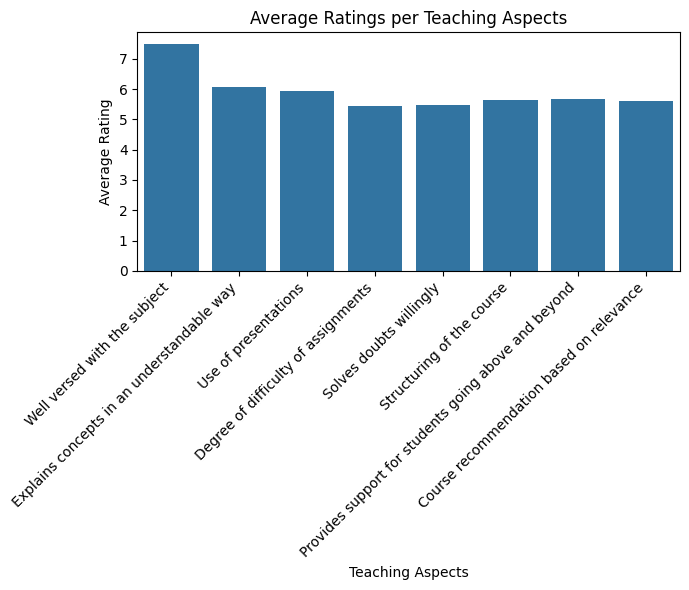

In [99]:
# Exclude 'Unnamed: 0', 'Student ID', and any non-numeric columns for calculating the mean
numeric_rating_columns = df.select_dtypes(include='number').columns.tolist()
numeric_rating_columns = [col for col in numeric_rating_columns if col not in ['Unnamed: 0', 'Student ID', 'average_rating','sentiment_polarity']]

avg_ratings = df[numeric_rating_columns].mean()

plt.figure(figsize=(7, 6))
# Reset the index to make category names a column for seaborn
avg_ratings_df = avg_ratings.reset_index()
avg_ratings_df.columns = ['Category', 'Average Rating']
sns.barplot(x='Category', y='Average Rating', data=avg_ratings_df)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.title('Average Ratings per Teaching Aspects')
plt.ylabel('Average Rating')
plt.xlabel('Teaching Aspects')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Distribution of Ratings on one of the teaching aspects

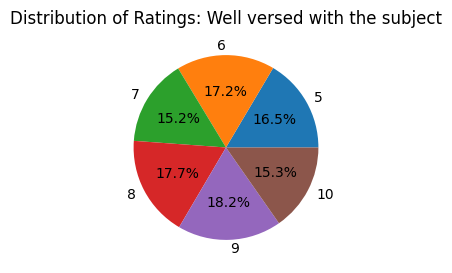

In [87]:
# Exclude 'Unnamed: 0', 'Student ID', and 'sentiment'
rating_columns = [col for col in df.columns if col not in ['Unnamed: 0', 'Student ID', 'sentiment']]
# Pie Chart: Distribution of ratings for 'Well versed with the subject'
plt.figure(figsize=(3,3))
df['Well versed with the subject'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Ratings: Teachers Well versed with the subject')
plt.ylabel('')
plt.show()

Correlation between rating different teaching aspects

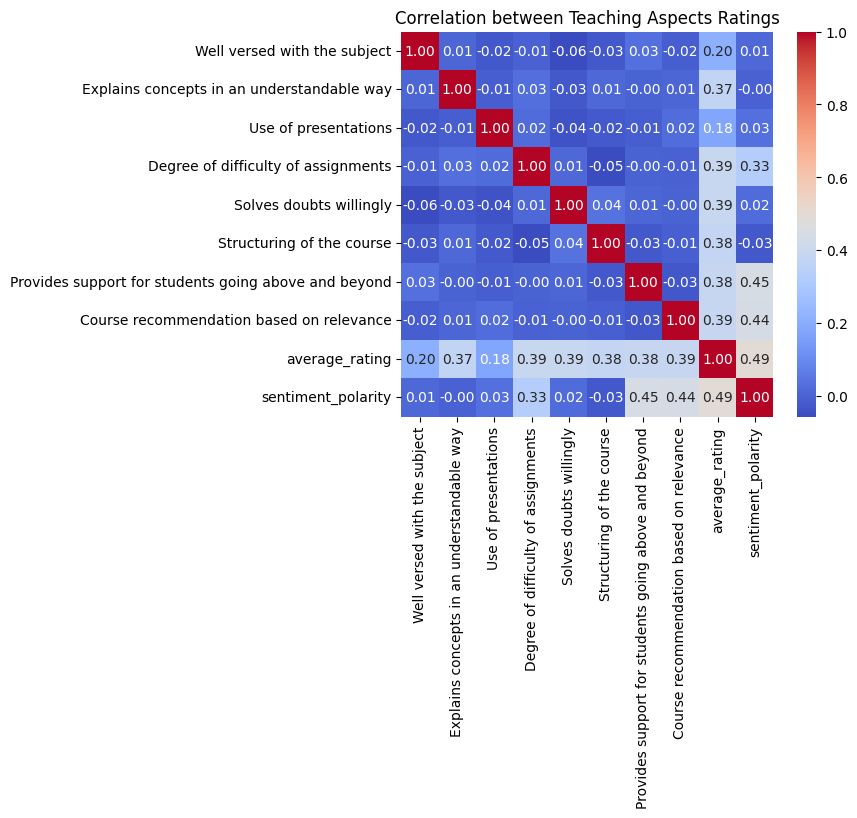

In [96]:
# Exclude 'Unnamed: 0', 'Student ID', and any non-numeric columns for correlation
numeric_columns = df.select_dtypes(include='number').columns
rating_columns_numeric = [col for col in numeric_columns if col not in ['Unnamed: 0', 'Student ID']]


# Heatmap: Correlation between rating categories
plt.figure(figsize=(6,5))
sns.heatmap(df[rating_columns_numeric].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Teaching Aspects Ratings')
plt.show()

Creating a Synthetic comments column for Senitmental Analysis(NLP)

In [71]:
def generate_comment(row):
    comments = []
    # Example rules for synthetic comments
    if row['Well versed with the subject'] >= 8:
        comments.append("The teacher is very knowledgeable in the subject.")
    elif row['Well versed with the subject'] >= 4:
        comments.append("The teacher has decent knowledge of the subject.")
    else:
        comments.append("The teacher has poor subject knowledge.")

    if row['Explains concepts in an understandable way'] >= 9:
        comments.append("The teacher explains concepts in an understandable way.")
    elif row['Explains concepts in an understandable way'] >= 4:
        comments.append("The teacher has decent understanding of concepts.")
    else:
        comments.append("The teacher confuses students.")

    if row['Use of presentations'] >=9:
        comments.append("The teacher uses presentations effectively.")
    elif row['Use of presentations'] >= 4:
        comments.append("The teacher has decent use of presentations.")
    else:
        comments.append("The teacher never uses presentations.")

    if row['Degree of difficulty of assignments'] >=9:
        comments.append("The teacher has easy assignments.")
    elif row['Degree of difficulty of assignments'] >= 4:
        comments.append("The teacher has decent difficulty of assignments.")
    else:
        comments.append("The teacher provies inadequate assignments.")

    if row['Structuring of the course'] >=9:
        comments.append("The teacher has structured the course well.")
    elif row['Structuring of the course'] >= 4:
        comments.append("The teacher has decent structuring of the course.")
    else:
        comments.append("The teacher never improves structuring of the course.")

    if row['Provides support for students going above and beyond'] >=9:
        comments.append("The teacher provides support for students going above and beyond.")
    elif row['Provides support for students going above and beyond'] >= 4:
        comments.append("The teacher has decent support for students going above and beyond.")
    else:
        comments.append("The teacher poorly provides support for students going above and beyond.")

    if row['Course recommendation based on relevance'] >=9:
        comments.append("The teacher recommends the course based on relevance.")
    elif row['Course recommendation based on relevance'] >= 4:
        comments.append("The teacher has decent recommendation based on relevance.")
    else:
        comments.append("The teacher poorly provides recommendation based on relevance.")

    if row['Solves doubts willingly'] >= 8:
        comments.append("Always eager to solve doubts.")
    elif row['Solves doubts willingly'] >= 4:
        comments.append("Somewhat helpful to solve doubts.")
    else:
        comments.append("Never solves doubts.")
    return " ".join(comments)

In [73]:
df['comments'] = df.apply(generate_comment, axis=1)

Using TextBlob for sentimental Analysis

In [74]:

df['sentiment_polarity'] = df['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

def classify_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment_polarity'].apply(classify_sentiment)

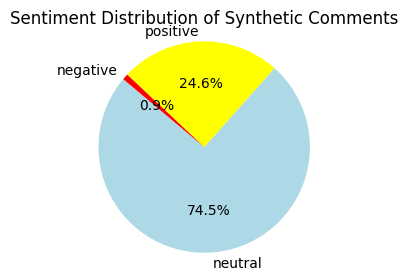

In [81]:
# Count sentiment categories
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

# Define colors for each sentiment
colors = ['lightblue', 'yellow', 'red']  # positive, neutral, negative

plt.figure(figsize=(3,3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Synthetic Comments')
plt.axis('equal')  # Equal aspect ratio to make pie circular
plt.show()
